In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import sys
sys.path.append("..")
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper

In [2]:
size = 100

In [3]:
colorschemes = color_schemes.get_colorbrewer_schemes()

In [4]:
gaussian_1 = [-10, 10, -10, 10, [-5, -5], [[ 5, 0],[0, 5]], size]
gaussian_2 = [-10, 10, -10, 10, [0, 0], [[ 5, 0],[0, 5]], size]
gaussian_3 = [-10, 10, -10, 10, [5, 5], [[ 20, 0],[0, 20]], size]
gaussian_4 = [-10, 10, -10, 10, [-2, 0], [[ 5, 0],[0, 5]], size]
gaussian_5 = [-10, 10, -10, 10, [0, 2], [[ 10, 0],[0, 15]], size]
gaussians = [gaussian_1, gaussian_2, gaussian_3, gaussian_4, gaussian_5]
z_list, image, z_sum = picture_worker.generate_image(gaussians, colorschemes)

In [5]:
from src import c_picture_worker
import numpy as np

In [6]:
img_list, z_list, z_sum = picture_worker.get_image_list(gaussians, colorschemes)

In [7]:
picture = c_picture_worker.call_hierarchic_merge(img_list, z_list)

In [8]:
picture_1 = c_picture_worker.call_hierarchic_alpha_sum_merge(img_list, z_list)

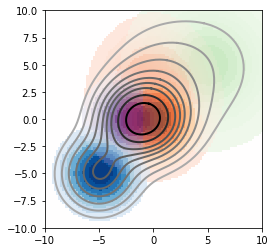

In [9]:
picture_worker.plot_image(plt, image, gaussians, z_sum)

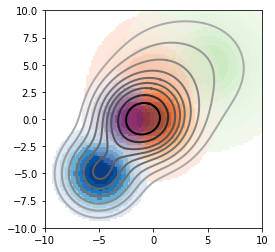

In [10]:
picture_worker.plot_image(plt, picture[0], gaussians, z_sum)

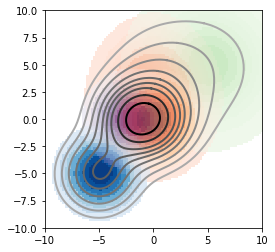

In [11]:
picture_worker.plot_image(plt, picture_1[0], gaussians, z_sum)